# Twitter API - Visualising the data

The code in this notebook is for visualising the ranking of wine types based on the frequency with which each category of wine is mentioned in the tweets we've gathered.

## Steps in visualising the tweets
1. Read each CSV file created based on the tweet requests and find the sum of tweets for each type of wine
2. Create a dataframe with the sum of each wine category for the four different tweet requests
3. Find the overall sum of each wine category which indicates the ranking of the wine types
4. Plot a pie chart with the percentage that each wine category was mentioned in the 4000 tweets

In [1]:
#Load modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Formatting Twitter API Data

In [2]:
##RED WINE##


# Read the CSV file
df_tweets_red = pd.read_csv("df_tweets_red.csv")
# Aggregate the data and find the sum of tweets for each type of wine
gb_tweets_red = df_tweets_red.groupby("red_wine")[
    ["white_wine", "sparkling_wine", "rose_wine", "red_wine"]
].aggregate(np.sum)
# Get the cumulative sum for each type of wine
gb_tweets_red["cumsum_white_wine"] = gb_tweets_red["white_wine"].cumsum()
gb_tweets_red["cumsum_sparkling_wine"] = gb_tweets_red["sparkling_wine"].cumsum()
gb_tweets_red["cumsum_rose_wine"] = gb_tweets_red["rose_wine"].cumsum()
gb_tweets_red["cumsum_red_wine"] = gb_tweets_red["red_wine"].cumsum()


##WHITE WINE##


# Read the CSV file
df_tweets_white = pd.read_csv("df_tweets_white.csv")

# Aggregate the data and find the sum of tweets for each type of wine
gb_tweets_white = df_tweets_white.groupby("red_wine")[
    ["white_wine", "sparkling_wine", "rose_wine", "red_wine"]
].aggregate(np.sum)
# Get the cumulative sum for each type of wine
gb_tweets_white["cumsum_white_wine"] = gb_tweets_white["white_wine"].cumsum()
gb_tweets_white["cumsum_sparkling_wine"] = gb_tweets_white["sparkling_wine"].cumsum()
gb_tweets_white["cumsum_rose_wine"] = gb_tweets_white["rose_wine"].cumsum()
gb_tweets_white["cumsum_red_wine"] = gb_tweets_white["red_wine"].cumsum()


##SPARKLING WINE##


# Read the CSV file
df_tweets_sparkling = pd.read_csv("df_tweets_sparkling.csv")

# Aggregate the data and find the sum of tweets for each type of wine
gb_tweets_sparkling = df_tweets_sparkling.groupby("red_wine")[
    ["white_wine", "sparkling_wine", "rose_wine", "red_wine"]
].aggregate(np.sum)
# Get the cumulative sum for each type of wine
gb_tweets_sparkling["cumsum_white_wine"] = gb_tweets_sparkling["white_wine"].cumsum()
gb_tweets_sparkling["cumsum_sparkling_wine"] = gb_tweets_sparkling[
    "sparkling_wine"
].cumsum()
gb_tweets_sparkling["cumsum_rose_wine"] = gb_tweets_sparkling["rose_wine"].cumsum()
gb_tweets_sparkling["cumsum_red_wine"] = gb_tweets_sparkling["red_wine"].cumsum()


##ROSE WINE##

# Read the CSV file
df_tweets_rose = pd.read_csv("df_tweets_rose.csv")

# Aggregate the data and find the sum of tweets for each type of wine
gb_tweets_rose = df_tweets_rose.groupby("red_wine")[
    ["white_wine", "sparkling_wine", "rose_wine", "red_wine"]
].aggregate(np.sum)
# Get the cumulative sum for each type of wine
gb_tweets_rose["cumsum_white_wine"] = gb_tweets_rose["white_wine"].cumsum()
gb_tweets_rose["cumsum_sparkling_wine"] = gb_tweets_rose["sparkling_wine"].cumsum()
gb_tweets_rose["cumsum_rose_wine"] = gb_tweets_rose["rose_wine"].cumsum()
gb_tweets_rose["cumsum_red_wine"] = gb_tweets_rose["red_wine"].cumsum()

# ---------------------#

# Create a dataframe with the sum of each wine category for the four different tweet requests
gb_tweets = {
    "red_wine": list(
        gb_tweets_red.loc[
            1,
            [
                "cumsum_white_wine",
                "cumsum_red_wine",
                "cumsum_rose_wine",
                "cumsum_sparkling_wine",
            ],
        ]
    ),
    "white_wine": list(
        gb_tweets_white.loc[
            1,
            [
                "cumsum_white_wine",
                "cumsum_red_wine",
                "cumsum_rose_wine",
                "cumsum_sparkling_wine",
            ],
        ]
    ),
    "sparkling_wine": list(
        gb_tweets_sparkling.loc[
            1,
            [
                "cumsum_white_wine",
                "cumsum_red_wine",
                "cumsum_rose_wine",
                "cumsum_sparkling_wine",
            ],
        ]
    ),
    "rose_wine": list(
        gb_tweets_rose.loc[
            1,
            [
                "cumsum_white_wine",
                "cumsum_red_wine",
                "cumsum_rose_wine",
                "cumsum_sparkling_wine",
            ],
        ]
    ),
}

df_tweets = pd.DataFrame(gb_tweets)


## Visualisations

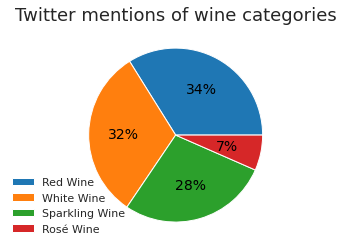

In [3]:
# Data of each wine and the number of tweets they get
data = [num for num in list(df_tweets.sum(axis = 0))]
keys = ['Red Wine', 'White Wine', 'Sparkling Wine', 'Rosé Wine']

#set the colour palette
palette_color = sns.color_palette() 

#set the font scale
sns.set(font_scale=1)

# Plotting the pie chart
_, _, text = plt.pie(data, colors=palette_color, autopct='%.0f%%')
plt.title('Twitter mentions of wine categories', fontsize = 18)

for txt in text: txt.set_color('black'), txt.set_fontsize(14)
plt.legend(keys, framealpha = 0, loc = 3, bbox_to_anchor = (-0.3, 0))

#save chart
plt.savefig('pie_chart.png') #uncomment to save chart

# displaying chart
plt.show()